## As many of us might share same doubt: Are these voice assistants really improving our lives?
Lots of people think they will only make us lazier. While some of us think they can have more time for works or other things with the help of voice assistants. I'll analyze these Alexa reviews to see if the users really think Alexa make their lives better.   
   
I'll start with words cloud to see whate words show up frequently and then dive into the reviews to summarize the positive review and negative reviews.

The ultimate goal is to find the pain points for those customers who don't like Alexa. And to build a NLP model predicting the rating by review!

* [Exploratory & Feature Engineer](#0)
 - [Text preprocessing](#p)
* [Counter](#1)   
* [SpaCy](#4)      
* [Modeling](#2)    
 - [Preprocessing](#pp)
 - [Model Tuning](#MT)
 - [Model Explanation and Evaluation](#ME)

# <a id="0">Exploratory</a>

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up matplotlib style
plt.style.use('ggplot')

# Libraries for wordcloud making and image importing
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

# And libraries for data transformation
import datetime
from string import punctuation

In [ ]:
# Import data and transform tsv file
data = pd.read_csv('../input/amazon-alexa-reviews/amazon_alexa.tsv', delimiter='\t')

In [ ]:
# Data overlook
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


### <a id="p">Text Preprocessing</a>

Since there are some difference between the ways people put reviews, let me do some transform before my analysis

In [ ]:
# Transform string data and remove punctuation
data['verified_reviews'] = data.verified_reviews.apply(lambda x: x.lower())
data['verified_reviews'] = data.verified_reviews.apply(lambda x: ''.join([c for c in x if c not in punctuation]))

In [ ]:
# Get length of review for EDA
data['review_length'] = data.verified_reviews.apply(lambda x: len(x))

In [ ]:
# Check the data again
data.head()

,rating,date,variation,verified_reviews,feedback,review_length
0,5,31-Jul-18,Charcoal Fabric,love my echo,1,12
1,5,31-Jul-18,Charcoal Fabric,loved it,1,8
2,4,31-Jul-18,Walnut Finish,sometimes while playing a game you can answer ...,1,192
3,5,31-Jul-18,Charcoal Fabric,i have had a lot of fun with this thing my 4 y...,1,168
4,5,31-Jul-18,Charcoal Fabric,music,1,5


In [ ]:
# Take a look at the mean, standard deviation, and maximum
print('The mean for the length of review:',data['review_length'].mean())
print('The standard deviation for the length of reviews:',data['review_length'].std())
print('The maximum for the length of reviews:',data['review_length'].max())

The mean for the length of review: 128.1615873015873
The standard deviation for the length of reviews: 177.17558499255605
The maximum for the length of reviews: 2730


Text(0.5, 1.0, 'Distribution of review length')

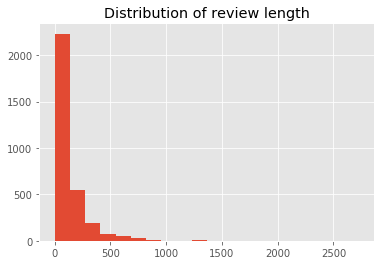

In [ ]:
# And take a look at the distribution of the length
data['review_length'].hist(bins=20)
plt.title('Distribution of review length')

In [ ]:
# Transform date to datetime data type
data['date'] = data.date.apply(lambda x:  datetime.datetime.strptime(x, '%d-%b-%y'))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 6 columns):
rating              3150 non-null int64
date                3150 non-null datetime64[ns]
variation           3150 non-null object
verified_reviews    3150 non-null object
feedback            3150 non-null int64
review_length       3150 non-null int64
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 147.7+ KB


In [ ]:
A = np.array(Image.open('../input/amazon-logo/amazon-logo-white.png'))

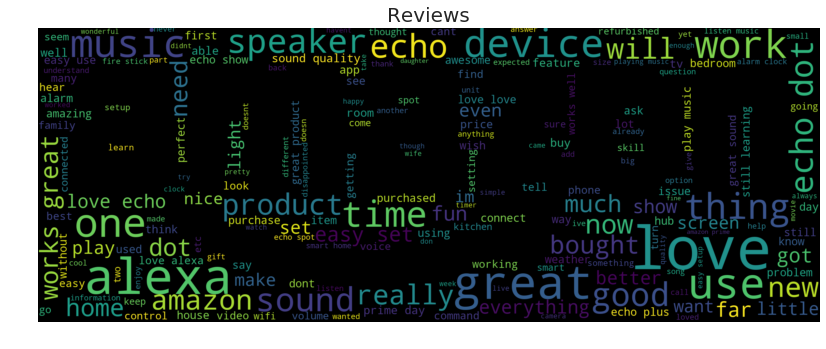

In [ ]:
np.random.seed(321)
sns.set(rc={'figure.figsize':(14,8)})
reviews = ' '.join(data['verified_reviews'].tolist())

wordcloud = WordCloud(mask=A,background_color="black").generate(reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Reviews',size=20)
plt.show()

I can see some normal words and some positive reviews.

For positive parts, I saw:

* love/ new
* works great/ better/ good

Text(0.5, 1.0, 'Counts of each variation')

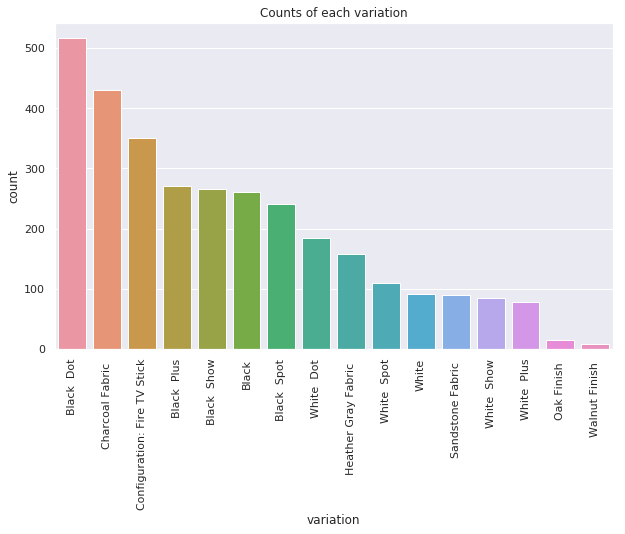

In [ ]:
sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(data.variation,
              order = data['variation'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Counts of each variation')

In [ ]:
data.rating.value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

In [ ]:
data5 = data[data.rating == 5]
data_not_5 = data[data.rating != 5]
data1 = data[data.rating == 1]

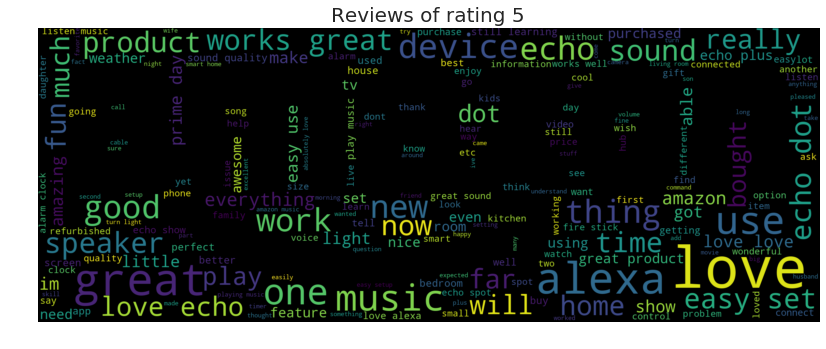

In [ ]:
sns.set(rc={'figure.figsize':(14,8)})
reviews = ' '.join(data5['verified_reviews'].tolist())

wordcloud = WordCloud(mask=A,background_color="black").generate(reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Reviews of rating 5',size=20)
plt.show()

In [ ]:
pd.options.display.max_colwidth = 200

data5[data5['verified_reviews'].str.contains('prime')]['verified_reviews'][:3]

39    this is my first digital assistant so im giving this a good review speaker is really good for the cheap price on prime day fun to play with and can be used as an alarm clock thats what i was going...
89                                                                                 works great but i dont think amazon should charge another cent for unlimited music when you 1 have prime and 2 buy an echo
94    love it i was thinking about getting one and when the prime day discount was offered i could not pass it up its fun to ask alexa to play any song or group and she comes up with a playlist from ama...
Name: verified_reviews, dtype: object

In [ ]:
data5[data5['verified_reviews'].str.contains('time ')]['verified_reviews'][:3]

12     i purchased this for my mother who is having knee problems now to give her something to do while trying to over come not getting around so fast like she didshe enjoys all the little and big things...
94     love it i was thinking about getting one and when the prime day discount was offered i could not pass it up its fun to ask alexa to play any song or group and she comes up with a playlist from ama...
140    i have had for only a week so i am still learning all that alexa can do  it is a learning process  i love the music i can call up any time  i listen to podcasts and radio stations  i have just sta...
Name: verified_reviews, dtype: object

In [ ]:
data5[data5['verified_reviews'].str.contains('easy')]['verified_reviews'][:3]

11    i love it learning knew things with it eveyday still figuring out how everything works but so far its been easy to use and understand she does make me laugh at times
16                                                                                                        really happy with this purchase  great speaker and easy to set up
26                        i love my echo its easy to operate loads of funit is everything as advertised i use it mainly to play my favorite tunes and test alexas knowledge
Name: verified_reviews, dtype: object

I can see that for the people who use Alexa and give rating 5 think:

* Alexa is easy to use (set up)
* Frequently used by customers
* The service of connect to prime day is good and popular

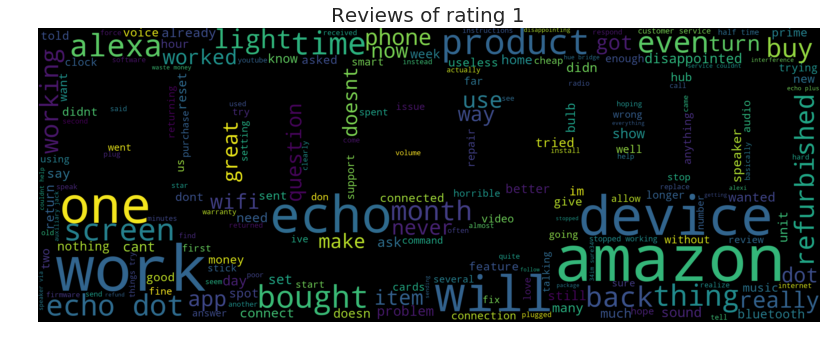

In [ ]:
sns.set(rc={'figure.figsize':(14,8)})
reviews = ' '.join(data1['verified_reviews'].tolist())

wordcloud = WordCloud(mask=A,background_color="black").generate(reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Reviews of rating 1',size=20)
plt.show()

In [ ]:
data1[data1['verified_reviews'].str.contains('useless')]['verified_reviews'][:3]

531     this is the worst amazon purchase i have made i am big amazon fanlove the brandunlimited digital musicprime videoseven buy my online games music and movies through amazon this app i have tried to ...
579                                                                                               great product but useless overall too many unnecessary features unless you have a smart home you dont need it
1209    this product currently has two related software flaws that make it completely unusable1 there is a 34card34 on the homescreen called 34things to try34  its an ad for other alexa services you can t...
Name: verified_reviews, dtype: object

The bad reviews are most about:

* Not fully-enabled service
* Echo works worse than other Amazon products

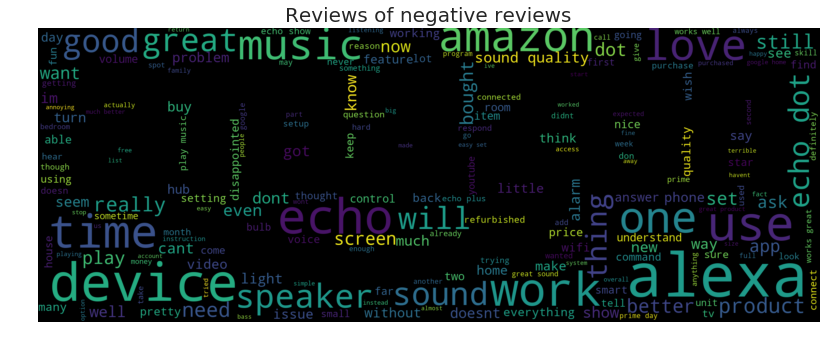

In [ ]:
reviews = ' '.join(data_not_5['verified_reviews'].tolist())

wordcloud = WordCloud(mask=A,background_color="black").generate(reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Reviews of negative reviews',size=20)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

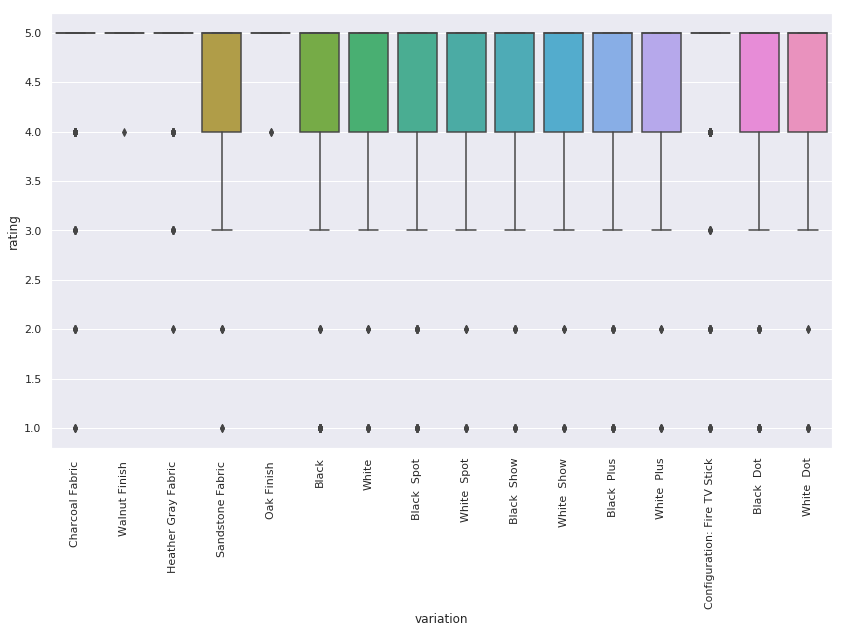

In [ ]:
sns.boxplot(data.variation, data.rating)
plt.xticks(rotation = 90)

This is seriously biased! Most reviews are rating 5. Those rating 1 and 2 are considered outliers in each product variation!

In [ ]:
data.head()

,rating,date,variation,verified_reviews,feedback,review_length
0,5,2018-07-31,Charcoal Fabric,love my echo,1,12
1,5,2018-07-31,Charcoal Fabric,loved it,1,8
2,4,2018-07-31,Walnut Finish,sometimes while playing a game you can answer a question correctly but alexa says you got it wrong and answers the same as you i like being able to turn lights on and off while away from home,1,192
3,5,2018-07-31,Charcoal Fabric,i have had a lot of fun with this thing my 4 yr old learns about dinosaurs i control the lights and play games like categories has nice sound when playing music as well,1,168
4,5,2018-07-31,Charcoal Fabric,music,1,5


In [ ]:
data_date = data.groupby('date').count()

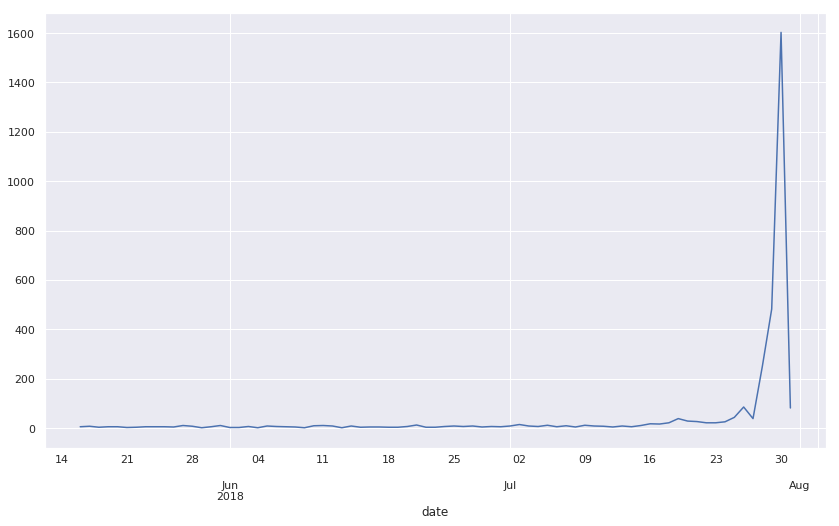

In [ ]:
data_date.rating.plot()

It's weird that there is a peak in the end of July. I'll do some research for now.

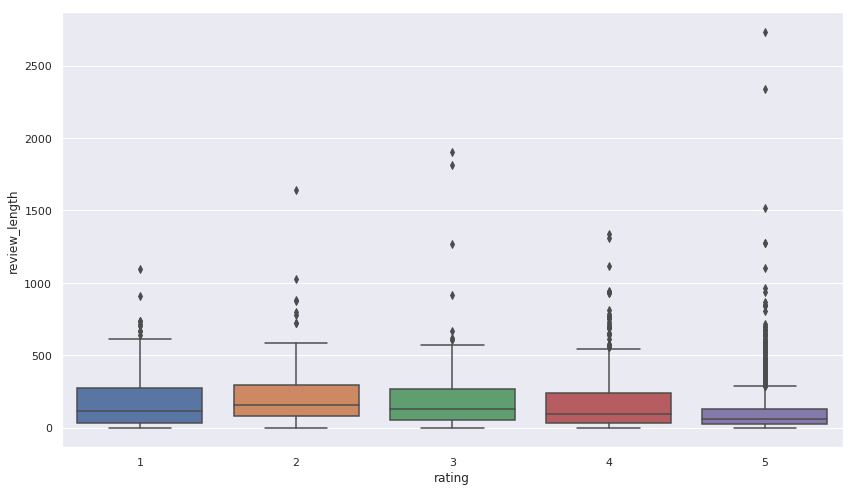

In [ ]:
sns.boxplot('rating','review_length',data=data)

It's not obvious but rating 5 has lower distribution and median.

In [ ]:
data['log_review_length'] = data.review_length.apply(lambda x: (np.log(x)+1))

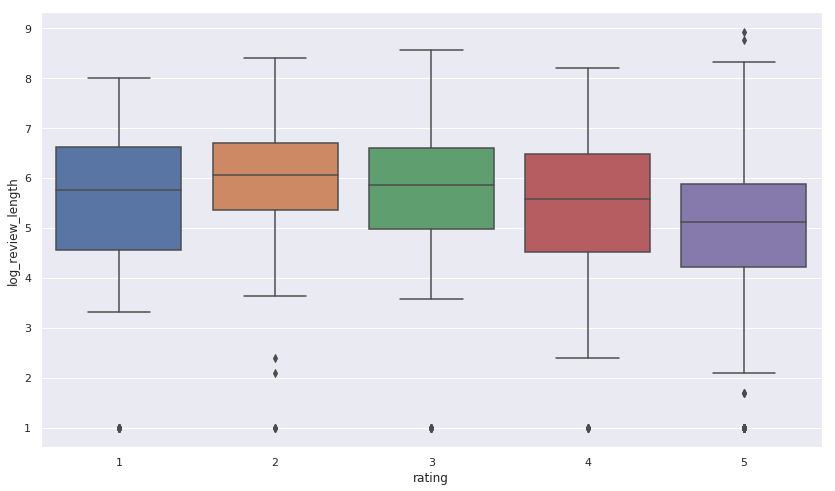

In [ ]:
sns.boxplot('rating','log_review_length',data=data)

Well, this is more obvious.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

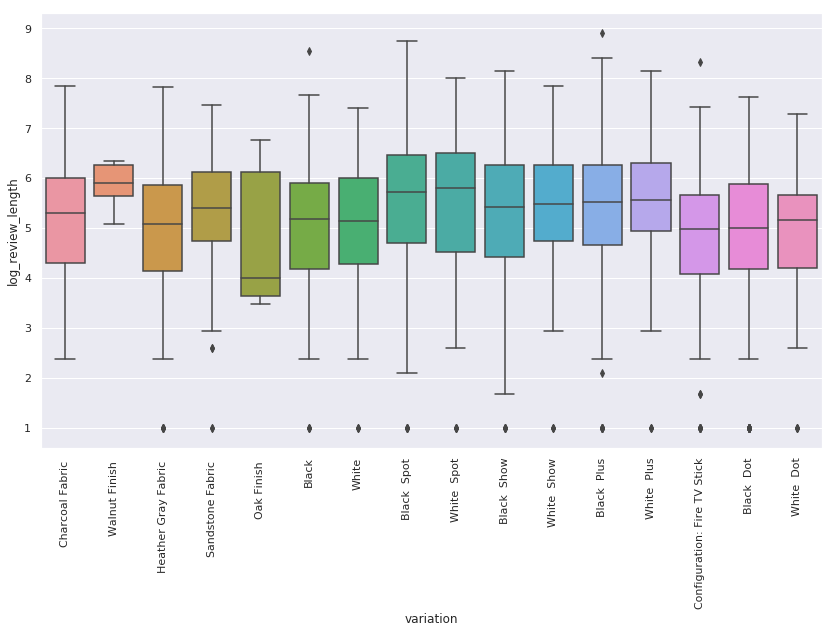

In [ ]:
sns.boxplot('variation','log_review_length',data=data)
plt.xticks(rotation = 90)

# <a id="1">Counter</a>

## I'll start do some preprocessing here for further modeling here first. This kernel is still in progress and has not been organized. I'll make it more ready for readying!

In [ ]:
from collections import Counter

text = ' '.join(data['verified_reviews'].tolist())
review_word = text.split(' ')
all_reviews = ' '.join(review_word)
words = all_reviews.split()

# words wrong datatype
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int = {word: ii for ii, word in enumerate(vocab, 1)}

reviews_ints = []
for review in review_word:
    reviews_ints.append([vocab_to_int[word] for word in review.split()])

In [ ]:
print('Unique words: ', len((vocab_to_int)))

Unique words:  4613


In [ ]:
counts.most_common(20)

[('the', 3245),
 ('i', 2952),
 ('to', 2821),
 ('it', 2550),
 ('and', 2219),
 ('a', 1503),
 ('my', 1390),
 ('is', 1218),
 ('for', 1061),
 ('love', 951),
 ('echo', 825),
 ('this', 823),
 ('with', 786),
 ('of', 766),
 ('have', 753),
 ('great', 717),
 ('in', 653),
 ('that', 651),
 ('but', 634),
 ('alexa', 586)]

In [ ]:
data1['rating'].value_counts()

1    161
Name: rating, dtype: int64

In [ ]:
text1 = ' '.join(data1['verified_reviews'].tolist())
review_word1 = text1.split(' ')
all_reviews1 = ' '.join(review_word1)
words1 = all_reviews1.split()

# words wrong datatype
counts1 = Counter(words1)
vocab1 = sorted(counts1, key=counts1.get, reverse=True)
vocab_to_int1 = {word: ii for ii, word in enumerate(vocab1, 1)}

reviews_ints1 = []
for review in review_word1:
    reviews_ints1.append([vocab_to_int1[word] for word in review.split()])

In [ ]:
counts1.most_common(20)

[('the', 261),
 ('i', 202),
 ('to', 198),
 ('it', 172),
 ('and', 152),
 ('a', 123),
 ('is', 85),
 ('not', 83),
 ('this', 77),
 ('of', 71),
 ('for', 64),
 ('have', 60),
 ('my', 58),
 ('that', 53),
 ('you', 51),
 ('on', 49),
 ('echo', 49),
 ('in', 49),
 ('with', 46),
 ('but', 43)]

The only different I found between rating 1 data most common words is "but".

## <a id=4>SpaCy</a>

I'll implement Spacy from here. This is a great NLP library. I'm still getting used to it.

In [ ]:
data1 = pd.read_csv('../input/amazon-alexa-reviews/amazon_alexa.tsv', delimiter='\t')

In [ ]:
import spacy
nlp = spacy.load('en')

def explain_text_entities(text):
    doc = nlp(text)
    for ent in doc.ents:
        print(f'Entity: {ent}, Label: {ent.label_}, {spacy.explain(ent.label_)}')

In [ ]:
for i in range(15,20):
    one_sentence = data1['verified_reviews'][i]
    doc = nlp(one_sentence)
    spacy.displacy.render(doc, style='ent',jupyter=True)

/opt/conda/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/opt/conda/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


### So the Spacy can find out the specific words for you. However, it depends on the package you load in to be accurate or not

I'll demonstrate three different models below:

In [ ]:
for i in ['en_core_web_sm','en_core_web_lg']:
    nlp = spacy.load(i)
    print('This is model:',i)
    for i in range(17,22):
        one_sentence = data1['verified_reviews'][i]
        doc = nlp(one_sentence)
        spacy.displacy.render(doc, style='ent',jupyter=True)

This is model: en_core_web_sm


This is model: en_core_web_lg


## We can see the entities they identify are different. And we need to find a right one for your analysis

I'll leave it here and move on to the modeling

## <a id="2">Modeling</a>

## NLP start from here!

In [ ]:
data.head()

,rating,date,variation,verified_reviews,feedback,review_length,log_review_length
0,5,2018-07-31,Charcoal Fabric,love my echo,1,12,3.484907
1,5,2018-07-31,Charcoal Fabric,loved it,1,8,3.079442
2,4,2018-07-31,Walnut Finish,sometimes while playing a game you can answer a question correctly but alexa says you got it wrong and answers the same as you i like being able to turn lights on and off while away from home,1,192,6.257495
3,5,2018-07-31,Charcoal Fabric,i have had a lot of fun with this thing my 4 yr old learns about dinosaurs i control the lights and play games like categories has nice sound when playing music as well,1,168,6.123964
4,5,2018-07-31,Charcoal Fabric,music,1,5,2.609438


In [ ]:
data['positive'] = 0
data.loc[data['rating'] ==5, 'positive'] = 1

y = data['positive']

### <a id="pp">Preprocessing</a>

In [ ]:
from nltk.tokenize import word_tokenize

word_tokenize(data.verified_reviews[0])

['love', 'my', 'echo']

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

data['cleaned_reviews'] = data.verified_reviews.apply(lambda x: word_tokenize(x))

data['cleaned_reviews'] = data.cleaned_reviews.apply(lambda x: [w for w in x if w not in stop_words])

data['cleaned_reviews'] = data.cleaned_reviews.apply(lambda x: ' '.join(x))

In [ ]:
data.head()

,rating,date,variation,verified_reviews,feedback,review_length,log_review_length,positive,cleaned_reviews
0,5,2018-07-31,Charcoal Fabric,love my echo,1,12,3.484907,1,love echo
1,5,2018-07-31,Charcoal Fabric,loved it,1,8,3.079442,1,loved
2,4,2018-07-31,Walnut Finish,sometimes while playing a game you can answer a question correctly but alexa says you got it wrong and answers the same as you i like being able to turn lights on and off while away from home,1,192,6.257495,0,sometimes playing game answer question correctly alexa says got wrong answers like able turn lights away home
3,5,2018-07-31,Charcoal Fabric,i have had a lot of fun with this thing my 4 yr old learns about dinosaurs i control the lights and play games like categories has nice sound when playing music as well,1,168,6.123964,1,lot fun thing 4 yr old learns dinosaurs control lights play games like categories nice sound playing music well
4,5,2018-07-31,Charcoal Fabric,music,1,5,2.609438,1,music


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 9 columns):
rating               3150 non-null int64
date                 3150 non-null datetime64[ns]
variation            3150 non-null object
verified_reviews     3150 non-null object
feedback             3150 non-null int64
review_length        3150 non-null int64
log_review_length    3150 non-null float64
positive             3150 non-null int64
cleaned_reviews      3150 non-null object
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 221.6+ KB


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_train, X_test, y_train, y_test = train_test_split(data["cleaned_reviews"], y, test_size=0.33
                                    ,random_state=53)

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words="english")

# Transform the training data using only the 'text' column values: count_train
count_train = count_vectorizer.fit_transform(X_train)

y_train = np.asarray(y_train.values)

ch2 = SelectKBest(chi2, k = 300)

X_new = ch2.fit_transform(count_train, y_train)

# Transform the test data using only the 'text' column values: count_test
count_test = count_vectorizer.transform(X_test)

X_test_new = ch2.transform(X=count_test)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)

# Transform the training data: tfidf_train
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data: tfidf_test
tfidf_test = tfidf_vectorizer.transform(X_test)

In [ ]:
# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

# Print the head of count_df
print(count_df.head())

# Print the head of tfidf_df
print(tfidf_df.head())

# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))


   10  100  1000  100x  1010   ...     zero  zigbee  zonkedout  zwave  zzzzzzz
0   0    0     0     0     0   ...        0       0          0      0        0
1   0    0     0     0     0   ...        0       0          0      0        0
2   0    0     0     0     0   ...        0       0          0      0        0
3   0    0     0     0     0   ...        0       0          0      0        0
4   0    0     0     0     0   ...        0       0          0      0        0

[5 rows x 3483 columns]
    10  100  1000  100x  1010   ...     zero  zigbee  zonkedout  zwave  zzzzzzz
0  0.0  0.0   0.0   0.0   0.0   ...      0.0     0.0        0.0    0.0      0.0
1  0.0  0.0   0.0   0.0   0.0   ...      0.0     0.0        0.0    0.0      0.0
2  0.0  0.0   0.0   0.0   0.0   ...      0.0     0.0        0.0    0.0      0.0
3  0.0  0.0   0.0   0.0   0.0   ...      0.0     0.0        0.0    0.0      0.0
4  0.0  0.0   0.0   0.0   0.0   ...      0.0     0.0        0.0    0.0      0.0

[5 rows x 3483 colum

In [ ]:
# Import the necessary modules
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB


# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(X_new, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(X_test_new)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print('Accuracy is:',score)
f1 = metrics.f1_score(y_test, pred)
print('F score is:',f1)

Accuracy is: 0.8048076923076923
F score is: 0.8735202492211838


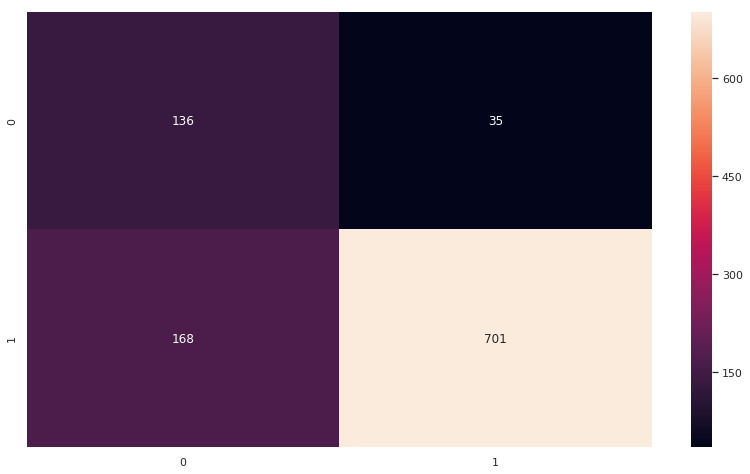

In [ ]:
sns.heatmap(metrics.confusion_matrix(pred,y_test),annot=True,fmt='2.0f')

Obviously, it's easy to predict positive (rating 5). But since the labels (positive or not) is pretty biased, the negative ratings are hard to catch. Only half of them are successfully predicted. Let's dive into more about it!

2019-1-23 update: I remove some meaningless words from the review and make it to predict 3 reivew correctly. I'll dive deeper to see how can I preprocess the text

In [ ]:
# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train,y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print('Accuracy is:',score)
f1 = metrics.f1_score(y_test, pred)
print('F score is:',f1)

Accuracy is: 0.7307692307692307
F score is: 0.8401826484018265


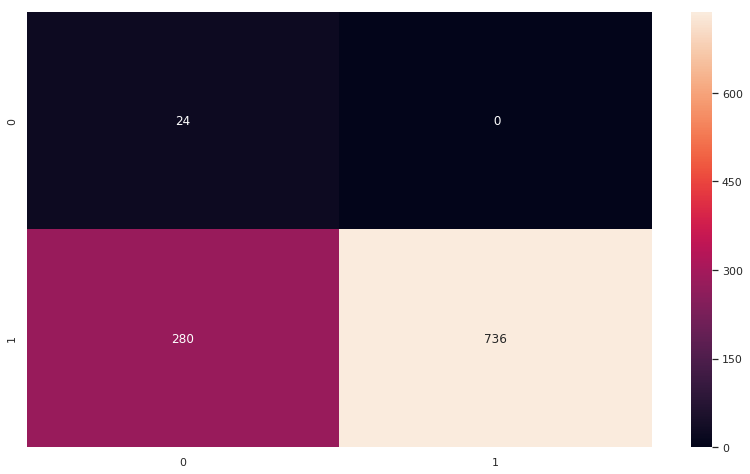

In [ ]:
sns.heatmap(metrics.confusion_matrix(pred,y_test),annot=True,fmt='2.0f')

Using TfidfVectorizer is even worse. It made it to get all positive reviews, but missed most of the negative reviews, which is not our goal for the most of time!

But how about putting them together?

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
def TextPreprocessing(train,train_y,test):

    CountVectorizer(stop_words="english")
    count = count_vectorizer.fit_transform(train)
    count_test = count_vectorizer.transform(X_test)

    tfidf_vectorizer = TfidfTransformer()
    tfidf = tfidf_vectorizer.fit_transform(count)
    tfidf_test = tfidf_vectorizer.transform(count_test)

    ch2 = SelectKBest(chi2, k = 300)

    train_new = ch2.fit_transform(tfidf, y_train)
    test_new = ch2.transform(tfidf_test)

    return train_new, test_new

In [ ]:
train, test = TextPreprocessing(X_train,y_train,X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=51)
# Fit the classifier to the training data
clf.fit(train, y_train)

# Create the predicted tags: pred
pred = clf.predict(test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print('Accuracy is:',score)
f1 = metrics.f1_score(y_test, pred)
print('F score is:',f1)

Accuracy is: 0.7971153846153847
F score is: 0.8656906429026097


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=51)
# Fit the classifier to the training data
clf.fit(X_new, y_train)

# Create the predicted tags: pred
pred = clf.predict(X_test_new)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print('Accuracy is:',score)
f1 = metrics.f1_score(y_test, pred)
print('F score is:',f1)


Accuracy is: 0.7980769230769231
F score is: 0.86875


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


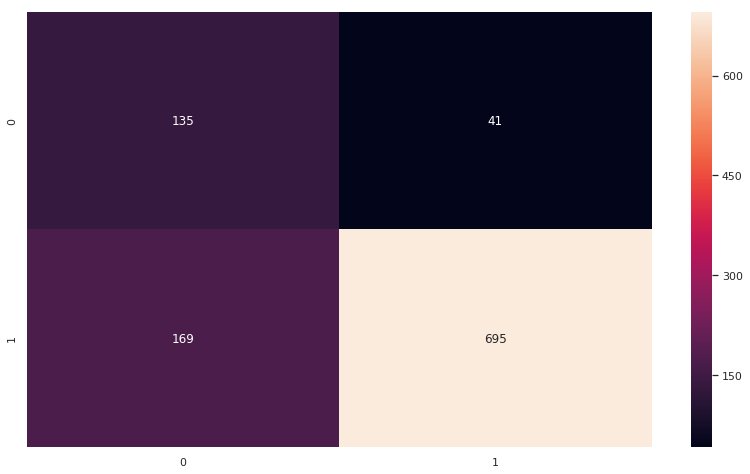

In [ ]:
sns.heatmap(metrics.confusion_matrix(pred,y_test),annot=True,fmt='2.0f')

In [ ]:
clf = RandomForestClassifier(random_state=51)
# Fit the classifier to the training data
clf.fit(tfidf_train, y_train)

# Create the predicted tags: pred
pred = clf.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print('Accuracy is:',score)
f1 = metrics.f1_score(y_test, pred)
print('F score is:',f1)


Accuracy is: 0.8067307692307693
F score is: 0.873186119873817


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


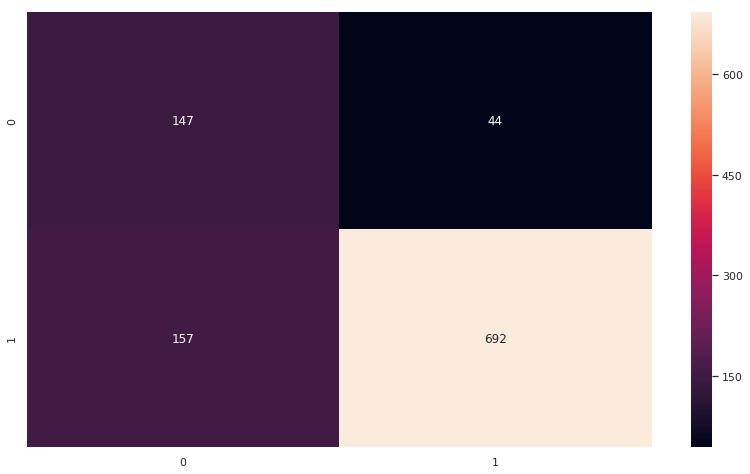

In [ ]:
sns.heatmap(metrics.confusion_matrix(pred,y_test),annot=True,fmt='2.0f')

I use SelectKBest library to keep only 2000 words for training. However, it performs worse for the Naive Bayes models, but better for the random forest classifier.

### <a id="MT">Model Tuning</a>

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

scorer = metrics.make_scorer(metrics.fbeta_score, beta=0.5)

parameters = {'n_estimators': [150, 180, 250], 'max_features': [120,150], 'max_depth': [120,135,150],
              'min_samples_split':[3,5],'min_samples_leaf':[1,3,5]}

grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

grid_fit = grid_obj.fit(X_new, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

best_predictions = best_clf.predict(X_test_new)

score = metrics.accuracy_score(y_test, best_predictions)
print('Accuracy is:',score)
f1 = metrics.f1_score(y_test, best_predictions)
print('F score is:',f1)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Accuracy is: 0.8259615384615384
F score is: 0.8856601389766267


In [ ]:
best_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=150, max_features=120, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=180, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## <a id="ME">Model Explaination and evaluation</a>

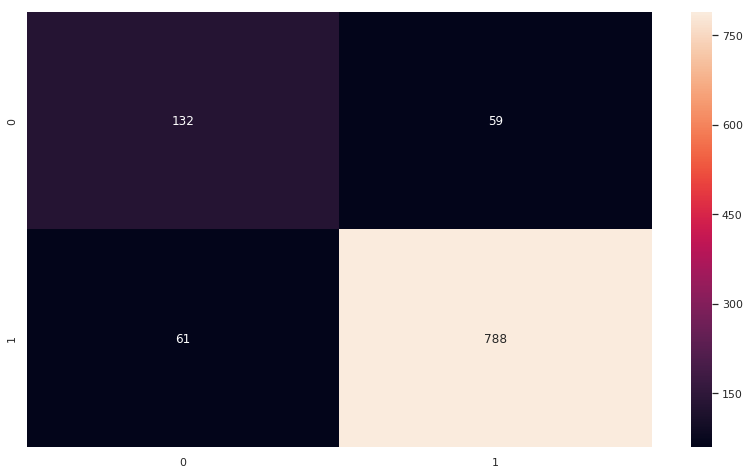

In [ ]:
sns.heatmap(metrics.confusion_matrix(pred,best_predictions),annot=True,fmt='2.0f')

This result is lovely! It has a balance between positive result and negative result since I use f score for scorer in the model tuning. This is what I want!

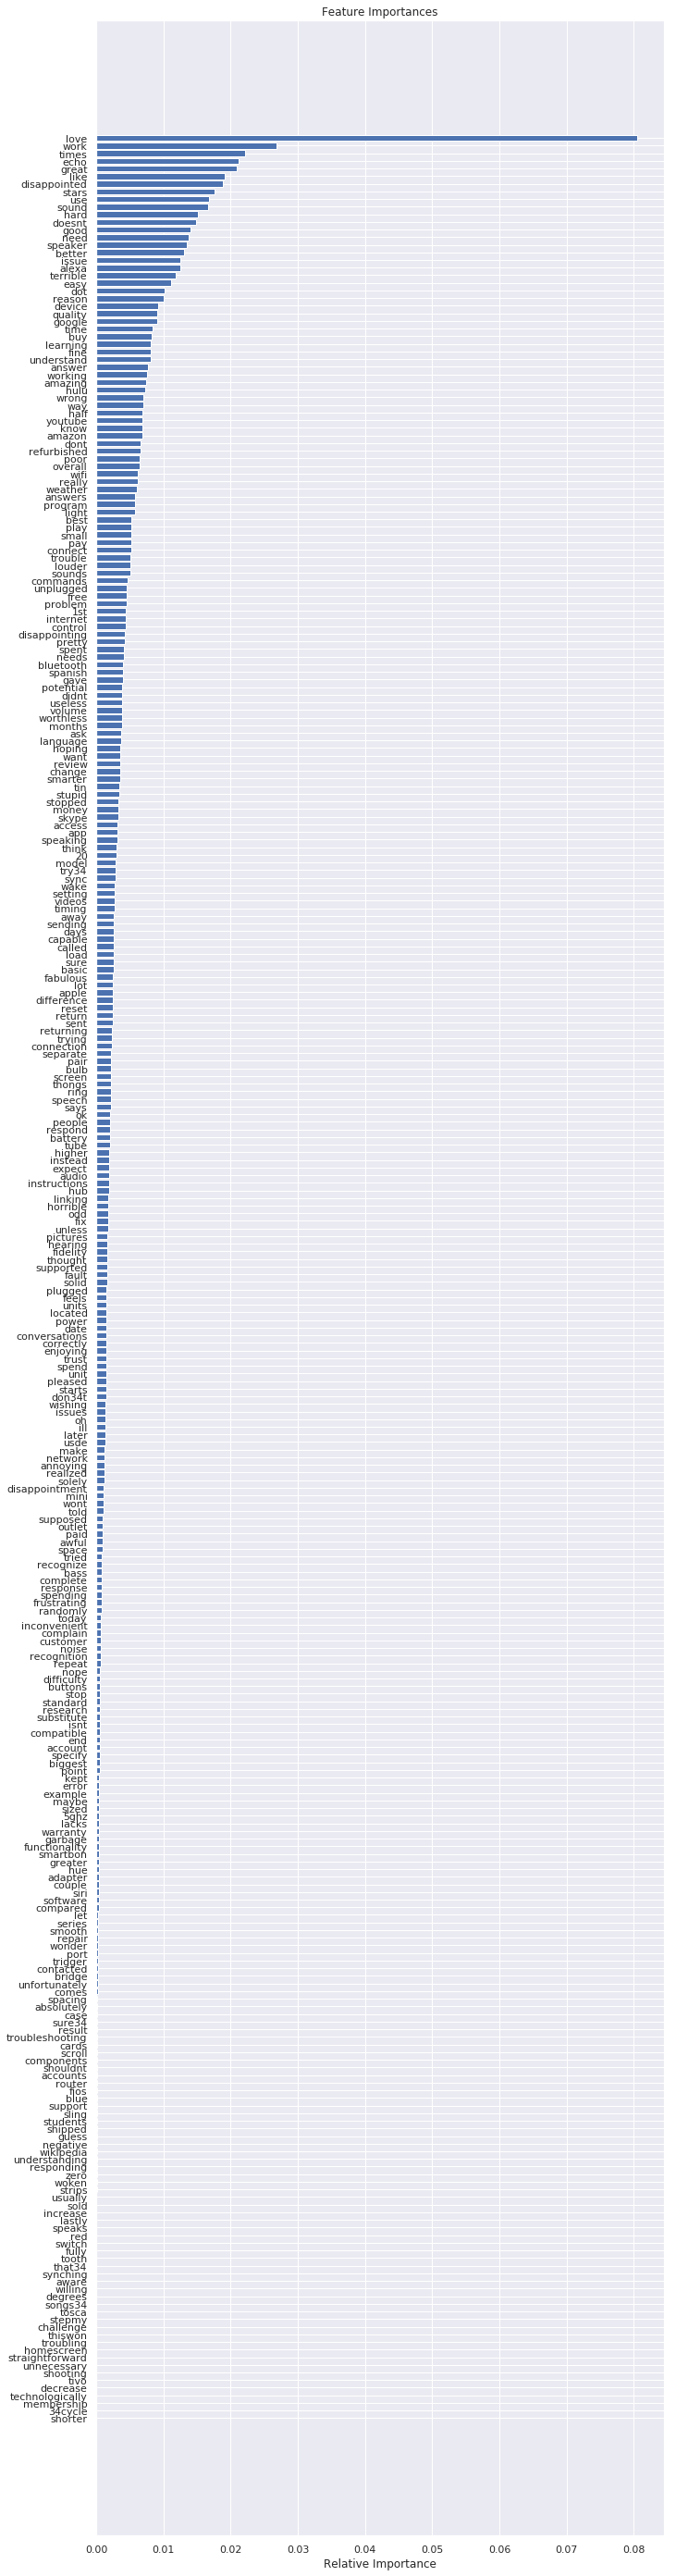

In [ ]:
from itertools import compress

features = count_vectorizer.get_feature_names()
mask = ch2.get_support()
features = list(compress(features, mask))
importances = best_clf.feature_importances_
indices = np.argsort(importances)

sns.set(rc={'figure.figsize':(11,50)})

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

X_test_new = X_test_new.toarray()

perm = PermutationImportance(best_clf, random_state=1).fit(X_test_new, y_test)
eli5.show_weights(perm, feature_names = features)

Weight,Feature
0.0385 ± 0.0142,love
0.0210 ± 0.0077,great
0.0175 ± 0.0092,work
0.0085 ± 0.0054,doesnt
0.0079 ± 0.0028,disappointed
0.0077 ± 0.0017,like
0.0069 ± 0.0084,dot
0.0069 ± 0.0028,speaker
0.0065 ± 0.0070,light
0.0063 ± 0.0020,easy


In [ ]:
best_clf.fit(count_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=150, max_features=120, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=180, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
eli5.show_prediction(best_clf, doc=X_train[20], vec=count_vectorizer)

Here you can see how each word effect the prediction. But since I already do some preprocessing, the sentence may not make too many sense

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(X_new, y_train)

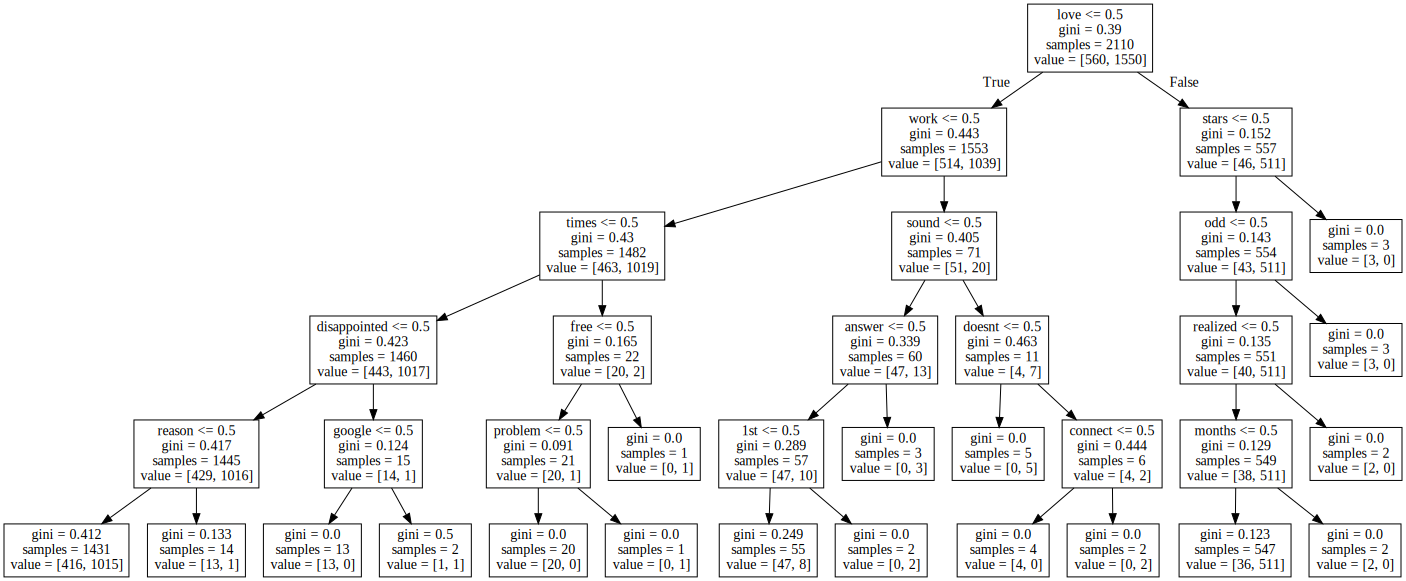

In [ ]:
from sklearn import tree
import graphviz

tree_graph = tree.export_graphviz(tree_model, feature_names=features)
graphviz.Source(tree_graph)

Here we can see that love is where the model start with, followed by work, buy, times, sound, and odd in the second layer. The other nodes, we can see how a simple decision tree model will classify the data into positive reviews or not.

In [ ]:
df = pd.DataFrame(X_test_new,columns = features)
df.head()

,1st,20,34cycle,5ghz,absolutely,access,account,accounts,adapter,alexa,amazing,amazon,annoying,answer,answers,app,apple,ask,audio,aware,away,awful,basic,bass,battery,best,better,biggest,blue,bluetooth,bridge,bulb,buttons,buy,called,capable,cards,case,challenge,change,...,trigger,trouble,troubleshooting,troubling,trust,try34,trying,tube,understand,understanding,unfortunately,unit,units,unless,unnecessary,unplugged,usde,use,useless,usually,videos,volume,wake,want,warranty,way,weather,wifi,wikipedia,willing,wishing,woken,wonder,wont,work,working,worthless,wrong,youtube,zero
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


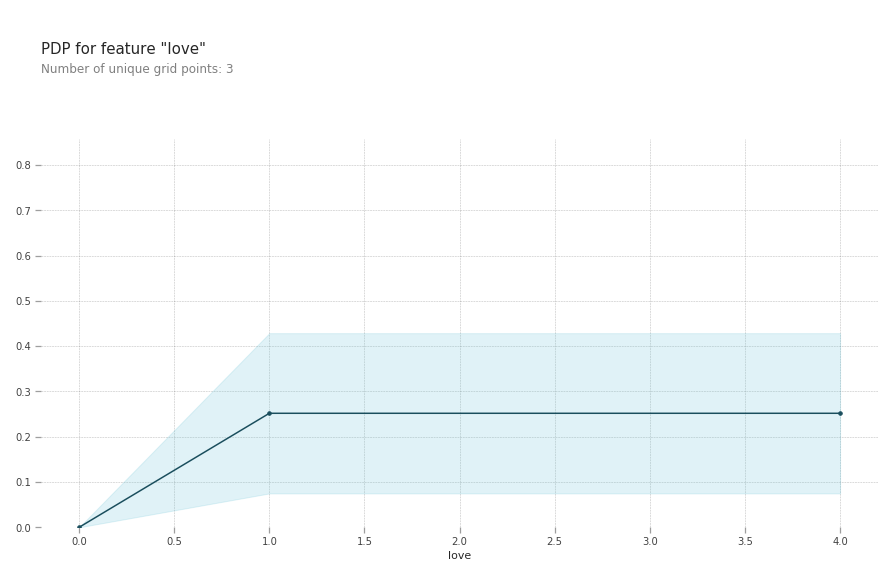

In [ ]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=tree_model, dataset=df, model_features=features, feature='love')

# plot it
pdp.pdp_plot(pdp_goals, 'love')
plt.show()

Since we can see that the first node is love smaller than 0.5 or not, it means that either there is a love in the review or not. It contributes about 0.27 percent to the model

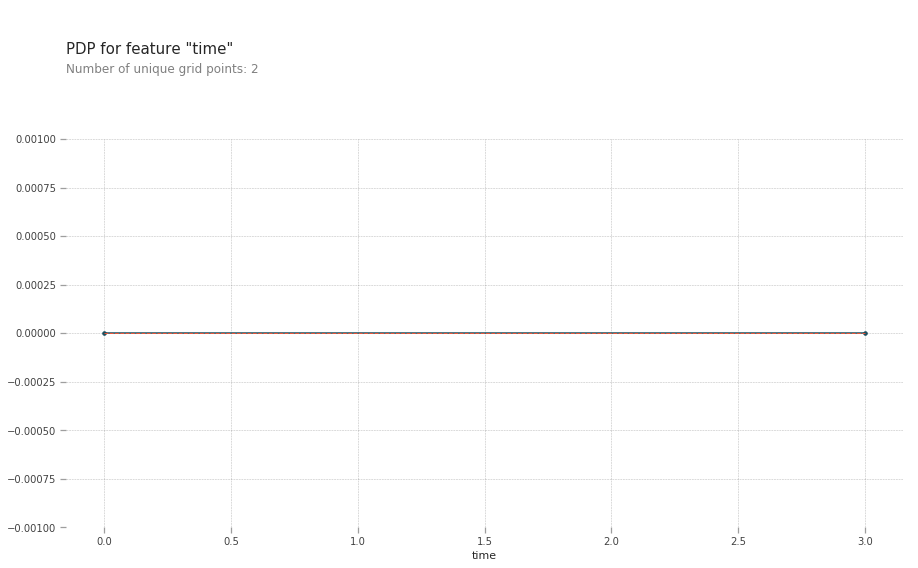

In [ ]:
feature_to_plot = 'time'
pdp_dist = pdp.pdp_isolate(model=tree_model, dataset=df, model_features=features, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

The more work show up in the review, the less possible it's a positive review. And it contributes at most about -0.375 to the prediction

In [ ]:
best_clf.fit(X_new, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=150, max_features=120, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=180, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

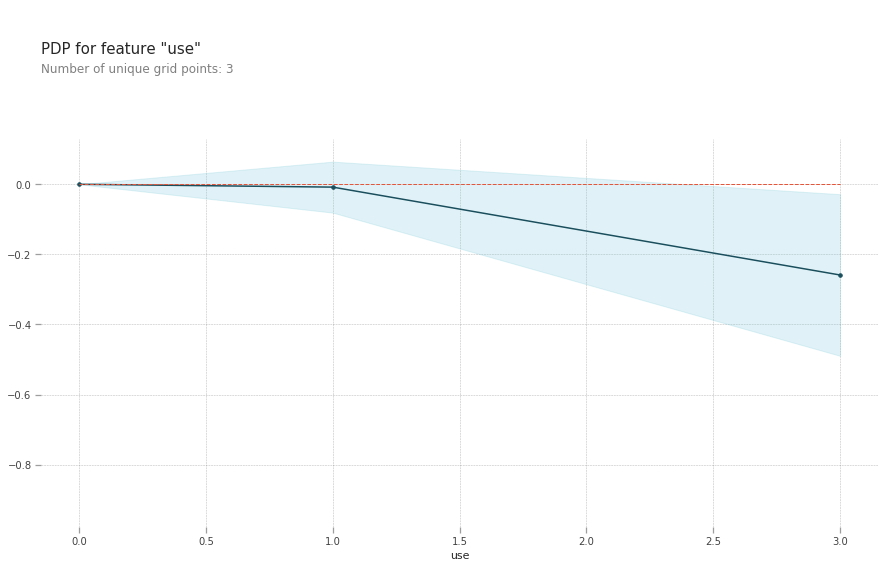

In [ ]:
# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=best_clf, dataset=df, model_features=features, feature='use')

# plot it
pdp.pdp_plot(pdp_goals, 'use')
plt.show()

This one is more interesting. I go back to use the Random Forest Classifier model to see how it think about 'use'. For the review with no more than 1 'use', it means nothing. We can easily see this phenomenon in the graph!

TypeError: clabel() got an unexpected keyword argument 'contour_label_fontsize'

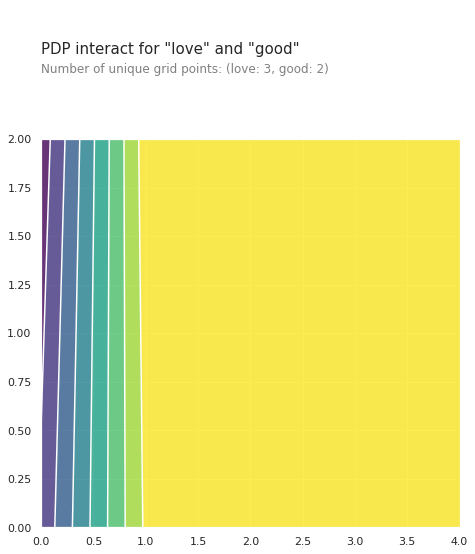

In [ ]:
# Similar to previous PDP plot except we use pdp_interact instead of pdp_isolate and pdp_interact_plot instead of pdp_isolate_plot
features_to_plot = ['love', 'good']
inter2  =  pdp.pdp_interact(model=best_clf, dataset=df, model_features=features, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter2, feature_names=features_to_plot, plot_type='contour')
plt.show()

Well, this is more straightforward. We can see the probibility is high on the left top and descreasing toward right bottom side.

In [ ]:
row_to_show = 5
data_for_prediction = df.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)


best_clf.predict_proba(data_for_prediction_array)

array([[0.65074074, 0.34925926]])

In [ ]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(best_clf)

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

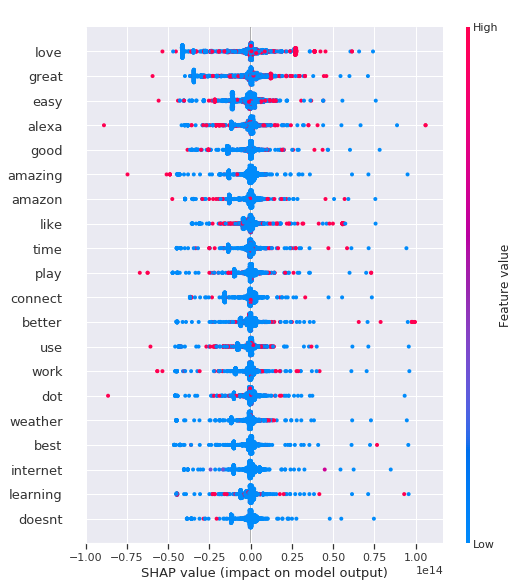

In [ ]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(best_clf)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(df)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], df)

We cab see that most of the values in each columns are only effective between 1 and -1

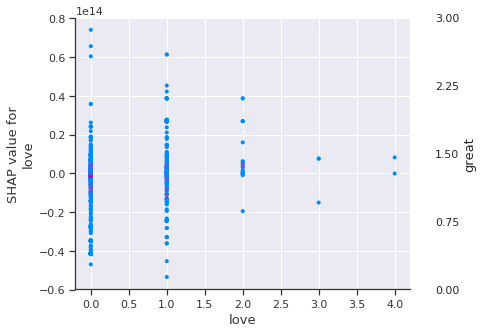

In [ ]:
shap.dependence_plot('love', shap_values[1], df, interaction_index="great")

We can tell that the NLP model is really complicated. Even though *love* is the main words for predicting the target, it doesn't really occupy the most of the factors. Only  some of the reviews with 1 or 2 *love* have darker dots and somehow effect the prediction.

### Summary

I try to demonstrate some points in this work:

* To do analysis on text data like this one   
* Trying SpaCy libraries to identify entities
* How can we preprocess text data for modeling
* Tuning model for specific goals
* How can we interpret our model in terms of variables or frequency or how they effect each other

I try my best to evaluate and explain my final model. I think it's good to know more how the model predict and value each words and make the deicision. It literally let me know my models are no longer the black box technology to me. And interpret the model can allow me to explain the insights to non-tech audience. Moreover, knowing how the model make the prediction can let me apply the knowledge of these nodes to the business.